### Machine Learning: Regression - Predicting Energy Efficiency of Buildings Quiz Code

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading dataset
frame = pd.read_csv('energydata_complete.csv')

In [3]:
# DataSet shape
print(type(frame))
print('Number of rows:', frame.shape[0])
print('Number of columns:', frame.shape[1])
print(frame['lights'].dtype)

<class 'pandas.core.frame.DataFrame'>
Number of rows: 19735
Number of columns: 29
int64


In [4]:
# DataFrame features distribution
frame.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


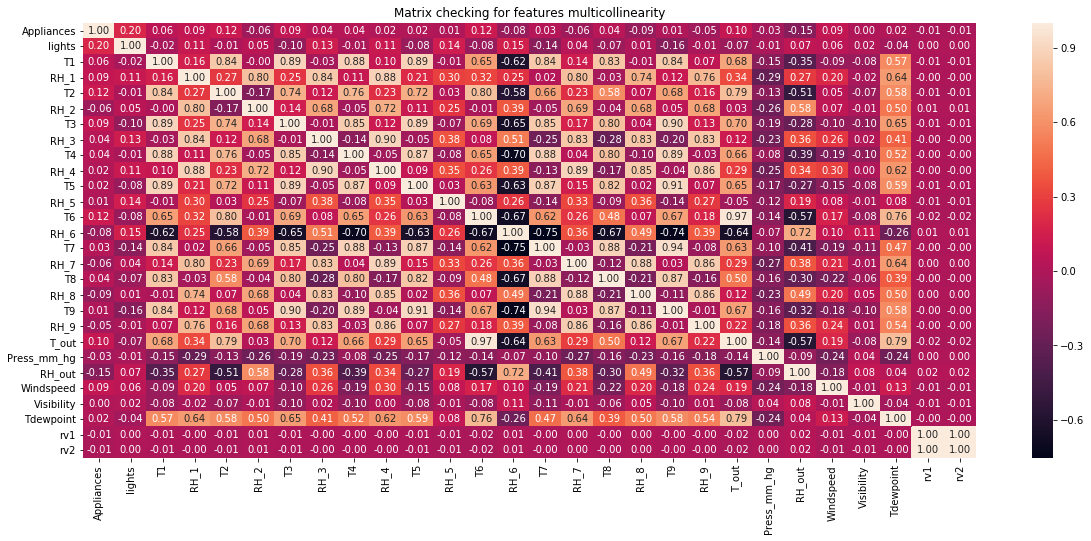

In [5]:
# Check for multicollinearity
corrMatrix = frame.corr()
fig = plt.figure(figsize=(20, 8))
ax = fig.gca()
sns.heatmap(corrMatrix, annot=True, fmt=".2f", ax=ax)
ax.set_title('Matrix checking for features multicollinearity')
plt.show()

In [6]:
# dropping date and light columns as they won't be needed for prediction
drop_cols = ['date', 'lights']
df = frame.drop(drop_cols, axis=1)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


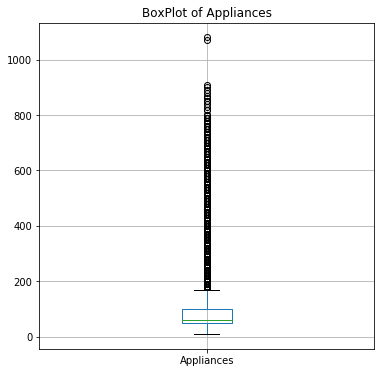

In [7]:
# Target variable "Appliances" visual representation
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
frame.boxplot(column = 'Appliances', ax = ax)
ax.set_title('BoxPlot of Appliances')
plt.show()

In [8]:
# segmenting Energy Data into independent and dependent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalized_df.drop(columns=['Appliances', 'rv1', 'rv2'])
random_var_df = normalized_df[['rv1', 'rv2']]
appliances_target = normalized_df['Appliances']

In [9]:
features_df.head(2)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.50000,0.953846,0.538462
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.47619,0.894872,0.533937


In [11]:
# split segmented data into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, appliances_target, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#fit the model to training dataset
linear_model.fit(x_train, y_train)
# predicting model
prediction = linear_model.predict(x_test)

#### Question 13

What is the Mean Absolute Error (in two decimal places)?


In [13]:
from sklearn.metrics import mean_absolute_error

#Evaluating model with MAE
print('MAE:')
mae1 = mean_absolute_error(y_test, prediction)
round(mae1, 2)

MAE:


0.05

#### Question 14

What is the Residual Sum of Squares (in two decimal places)?


In [14]:
#Evaluating model with RSS
print('RSS:')
rss1 = np.sum(np.square(y_test - prediction))
round(rss1, 2)

RSS:


45.33

#### Question 15

What is the Root Mean Squared Error (in three decimal places)?

In [15]:
from sklearn.metrics import mean_squared_error

#Evaluating model with RMSE
print('RMSE:')
rmse1 = np.sqrt(mean_squared_error(y_test, prediction))
round(rmse1, 2)

RMSE:


0.09

#### Question 16

What is the Coefficient of Determination (in two decimal places)? 

In [16]:
from sklearn.metrics import r2_score

#Evaluating model with RMSE
print('r2_score:')
r2_score1 = r2_score(y_test, prediction)
round(r2_score1, 2)

r2_score:


0.15

#### Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?


In [17]:
# creating two new dataframes as dependent and independent variables from the normalized dataframe 
t2_df = normalized_df[['T2']]
t6_target = normalized_df['T6']

#splitting into train and test set

x_train1, x_test1, y_train1, y_test1 = train_test_split(t2_df, t6_target, test_size=0.3, random_state=42)

# fitting the model to x=T2 (independent variable) and y=T6 (dependent variable)

linear_model1 = LinearRegression()
#fit the model to training dataset
linear_model1.fit(x_train1, y_train1)
# prediction
prediction1 = linear_model1.predict(x_test1)

#Evaluating model with RMSE
print('r2_score2:')
r2_score2 = r2_score(y_test1, prediction1)
round(r2_score2, 2)

r2_score2:


0.64

#### Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [18]:
# function to determine the weight of models

def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [19]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456587
1,T_out,-0.321718
2,T2,-0.236055
3,T9,-0.189866
4,RH_8,-0.157577
5,RH_out,-0.077563
6,RH_7,-0.044565
7,RH_9,-0.039879
8,T5,-0.015725
9,T1,-0.003342


#### Question 18

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [36]:
# fitting ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
# predicting with ridge
ridge_prediction = ridge_reg.predict(x_test)

# evaluating ridge_regression with RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_prediction))
print('RMSE_ridge:', rmse_ridge)

RMSE_ridge: 0.08751892422984307


#### Question 19

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [32]:
# fitting lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
# predicting with lasso
lasso_prediction = lasso_reg.predict(x_test)

# Lasso weights dataframe
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
print(lasso_weights_df)

# Non-Zero features in Lasso weights
lasso_weights_nonzero = lasso_weights_df.loc[lasso_weights_df['Lasso_Weight'] != 0].count()
print('Non-zero features in Lasso_weights:', lasso_weights_nonzero)

       Features  Lasso_Weight
0        RH_out     -0.049557
1          RH_8     -0.000110
2            T1      0.000000
3   Press_mm_hg     -0.000000
4         T_out      0.000000
5          RH_9     -0.000000
6            T9     -0.000000
7            T8      0.000000
8          RH_7     -0.000000
9            T7     -0.000000
10   Visibility      0.000000
11         RH_6     -0.000000
12         RH_5      0.000000
13           T5     -0.000000
14         RH_4      0.000000
15           T4     -0.000000
16         RH_3      0.000000
17           T3      0.000000
18         RH_2     -0.000000
19           T2      0.000000
20           T6      0.000000
21    Tdewpoint      0.000000
22    Windspeed      0.002912
23         RH_1      0.017880
Non-zero features in Lasso_weights: Features        4
Lasso_Weight    4
dtype: int64


#### Question 20

What is the new RMSE with the Lasso Regression (in 3 decimal places)?  

In [35]:
# evaluating lasso regression with RMSE

rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_prediction))
print('RMSE_lasso:', round(rmse_lasso, 3))

RMSE_lasso: 0.094


In [23]:
# Feature weights for my lasso, ridge and linear regression
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

In [25]:
final_weights_df = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights_df = pd.merge(final_weights_df, lasso_weights_df, on='Features')
final_weights_df

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456587,-0.410975,-0.000000
1,T_out,-0.321718,-0.262068,0.000000
2,T2,-0.236055,-0.201287,0.000000
3,T9,-0.189866,-0.188844,-0.000000
4,RH_8,-0.157577,-0.156812,-0.000110
5,RH_out,-0.077563,-0.054635,-0.049557
6,RH_7,-0.044565,-0.045930,-0.000000
7,RH_9,-0.039879,-0.041442,-0.000000
8,T5,-0.015725,-0.019916,-0.000000
9,T1,-0.003342,-0.018460,0.000000


##### Ps:

Initially I had lost hope when my quiz score showed up and I had 40%! I didn't think it would be necessary to submit my code since I scored less than 75% but, not after I got the mail that everyone will be allowed to complete the program and final score will be cumulative. I am sorry for my lackadaisical approach and for putting this in my notebook.

Me scoring very low in the quiz was due to syntax error in my code - which I kept stumbling on over and over and under pressure, until my time elaspsed. Afterwards I made necessary corrections to my notebook. I promise not to do this a second time and perform to the best of my abilities as the internship proceeds. With great excitement I look forward to the forthcoming sprints.

I really do hope this quiz code will be put into consideration.

Thank you Hamoye.